# Computer Infrastructure Assignment - Autumn 2025

## YFinance Assessment


In [1]:
# Imports

# Dates and time
import datetime as dt 

# Yahoo Finance data
import yfinance as yf

# Data frames
import pandas as pd 

# Plot
import matplotlib.pyplot as plt

import os

import glob


## Problem 1: Data from yfinance

Firstly, in this section I will use the yfinance Python package, already installed above. I will write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

I will then save the data that the function produces into the *data* folder, using a filename with the format YYYYMMDD-HHmmss.csv.

In [2]:
# Collect data for all FAANG 
# stocks over past 5 days
df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d')  

# Check that yfinance successfully installed
# df

/tmp/ipykernel_4090/2495335428.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d')
[*********************100%***********************]  5 of 5 completed


## Step 1:  
Create function that downloads all hourly data for the previous five days

In [3]:
# Create function 
def get_data():
    tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"] # assign tickers
    data = yf.download( #
    tickers=tickers, #
    period="5d", #
    interval="1h", #
    auto_adjust=False #
    )

    return data # 

# Call function
# get_data()


# https://realpython.com/defining-your-own-python-function/ 
# https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

# Step 2:
Save dataframe to csv file in data folder
using a filename with the format of the local date and time (i.e., YYYYMMDD-HHmmss.csv)

In [4]:
# get local date & time
local = dt.datetime.now().strftime("%Y%m%d-%H%M%S")

# Save data as csv
get_data().to_csv("./data/" +  # save to data folder 
                  local
                  + ".csv")        

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
# https://docs.python.org/3/library/datetime.html 

[*********************100%***********************]  5 of 5 completed


## Problem 2: Plotting Data

Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks.  
The plot should include axis labels, a legend, and the date as a title.  
The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png.

In [5]:
# View columns
get_data().columns

[*********************100%***********************]  5 of 5 completed


MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'GOOG'),
            ('Adj Close', 'META'),
            ('Adj Close', 'NFLX'),
            (    'Close', 'AAPL'),
            (    'Close', 'AMZN'),
            (    'Close', 'GOOG'),
            (    'Close', 'META'),
            (    'Close', 'NFLX'),
            (     'High', 'AAPL'),
            (     'High', 'AMZN'),
            (     'High', 'GOOG'),
            (     'High', 'META'),
            (     'High', 'NFLX'),
            (      'Low', 'AAPL'),
            (      'Low', 'AMZN'),
            (      'Low', 'GOOG'),
            (      'Low', 'META'),
            (      'Low', 'NFLX'),
            (     'Open', 'AAPL'),
            (     'Open', 'AMZN'),
            (     'Open', 'GOOG'),
            (     'Open', 'META'),
            (     'Open', 'NFLX'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'AMZN'),
            (   'Volume', 'GOOG'),
            (   'Vol

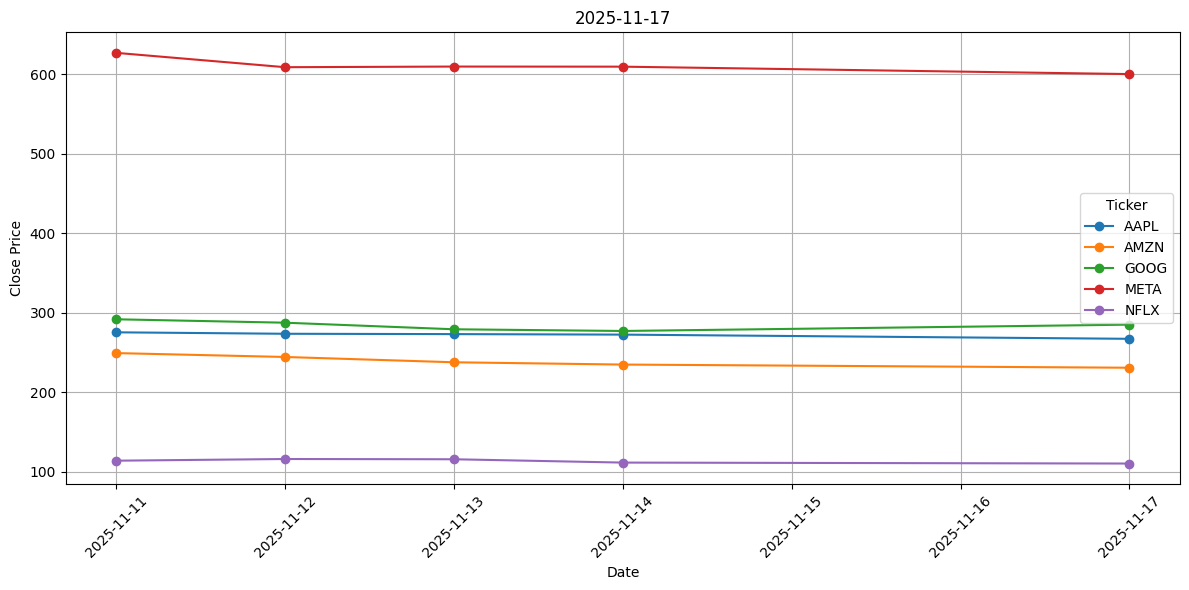

In [6]:
def plot_data():
    list_of_files = glob.glob('./data/*')  # get all files from data folder
    latest_file = max(list_of_files, key=os.path.getctime) # get latest file

    df2 = pd.read_csv(latest_file, header=[0,1], index_col=0)
    df2.index = pd.to_datetime(df2.index) # convert index to datetime to allow for date formatting

    faang = ['AAPL', 'AMZN', 'GOOG', 'META', 'NFLX'] # define tickers

    date_str = os.path.basename(latest_file).split("-")[0] # extract 1st 8 digits from filename to get date
    date = dt.datetime.strptime(date_str, "%Y%m%d").strftime("%Y-%m-%d") # format date for readability

    last_per_day = df2['Close'][faang].groupby(df2.index.date).last() # group by date and take last close price of each day
    last_5_days = last_per_day.tail(5) # select last 5 days 
    
    # plot data
    last_5_days.plot(figsize=(12,6), marker='o') # set figsize and markers for clarity

    # add titles & labels
    plt.title(f"{date}")
    plt.xticks(rotation=45) # rotate x axis for readability 
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.tight_layout()

    plots_folder = "./plots" # save to plots folder

    timestamp = dt.datetime.now().strftime("%Y%m%d-%H%M%S") # format filename to current date
    filename = os.path.join(plots_folder, f"{timestamp}.png") # join filename and filename/ create filename
    plt.savefig(filename, dpi=300)

    plt.show()

plot_data()

    
# https://sqlpey.com/python/top-10-methods-to-retrieve-latest-file-in-a-folder-using-python/
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
# https://www.geeksforgeeks.org/python/python-os-path-basename-method/
# https://www.geeksforgeeks.org/python/python-datetime-strptime-function/
# https://www.geeksforgeeks.org/python/python-strftime-function/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.last.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html 
# https://www.geeksforgeeks.org/python/python-os-path-join-method/


## Problem 3: Script

Create a Python script called faang.py in the root of your repository.  
Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot.  
* this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

- used chmod +x to change mode to excecute file  
https://www.geeksforgeeks.org/linux-unix/what-does-chmod-x-do-and-how-to-use-it/  
https://realpython.com/python-shebang/  


## Problem 4: Automation

Create a GitHub Actions workflow to run your script every Saturday morning.  
The script should be called faang.yml in a .github/workflows/ folder in the root of your repository.  
In your notebook, explain each of the individual lines in your workflow.

In [7]:
# add

## End